In [24]:
import IPython.display
import json
import xcube.api 

from xcube.api import read_cube

---
For this demo, we are focussing on the Danube Delta in Romania

In [25]:
file = 'Danube.geojson'
with open(file) as f:
    feature_collection = json.load(f)

features = feature_collection['features']
lake_names = [feature['properties']['LAKENAME'] for feature in features]
lake_names

['Lake Fortuna',
 'Lake Iacub',
 'Lake Isac',
 'Lake Matita',
 'Lake Puiu',
 'Lake Trei Iezere',
 'Lake Razim']

In [26]:
lake_razim = features[lake_names.index('Lake Razim')]

In [27]:
IPython.display.GeoJSON(lake_razim)

<IPython.display.GeoJSON object>

---

In [29]:
cube = read_cube('l2c-cyanoalert-olci-dan-Romania_2019-08-06_20.zarr')

The cube contains 5 time stamps:

In [30]:
cube.time

<xarray.DataArray 'time' (time: 5)>
array(['2019-08-16T04:03:39.513999616', '2019-08-17T09:21:51.376000000',
       '2019-08-18T00:55:51.728000000', '2019-08-19T00:29:57.696999936',
       '2019-08-20T00:03:55.287000064'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-08-16T04:03:39.513999616 ... 2019-08-20T00:03:55.287000064
Attributes:
    bounds:         time_bnds
    long_name:      time
    standard_name:  time

In [31]:
cube

<xarray.Dataset>
Dimensions:                 (bnds: 2, lat: 512, lon: 1024, time: 5)
Coordinates:
  * lat                     (lat) float64 45.33 45.33 45.33 ... 44.01 44.0 44.0
    lat_bnds                (lat, bnds) float64 dask.array<shape=(512, 2), chunksize=(512, 2)>
  * lon                     (lon) float64 28.0 28.0 28.01 ... 30.66 30.66 30.67
    lon_bnds                (lon, bnds) float64 dask.array<shape=(1024, 2), chunksize=(1024, 2)>
  * time                    (time) datetime64[ns] 2019-08-16T04:03:39.513999616 ... 2019-08-20T00:03:55.287000064
    time_bnds               (time, bnds) datetime64[ns] dask.array<shape=(5, 2), chunksize=(5, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_secchi_depth_1    (time, lat, lon) float64 dask.array<shape=(5, 512, 1024), chunksize=(1, 512, 1024)>
    c2rcc_secchi_depth_2    (time, lat, lon) float64 dask.array<shape=(5, 512, 1024), chunksize=(1, 512, 1024)>
    c2rcc_secchi_depth_3    (time, lat, lon) float64 dask.ar

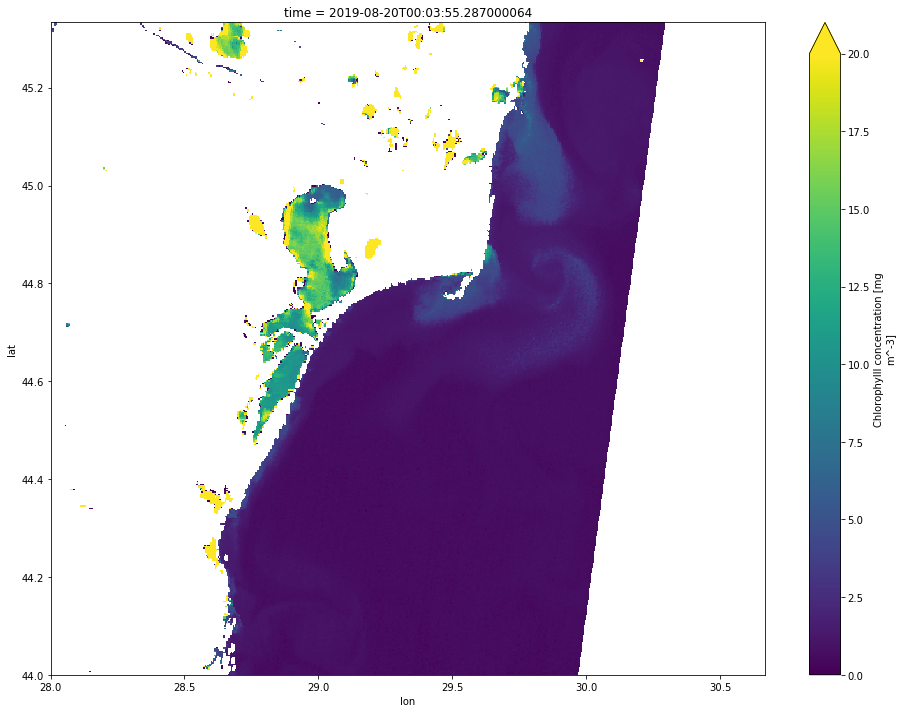

In [42]:
cube.chl_c2rcc.isel(time=4).plot.imshow(vmin=0, vmax=20, cmap='viridis', figsize=(16, 12))

Masking the cube to obtain only the area for the lake Razim.

In [54]:
masked_cube = xcube.api.mask_dataset_by_geometry(cube, lake_razim, save_geometry_mask=True, save_geometry_wkt=True)
masked_cube

<xarray.Dataset>
Dimensions:                 (bnds: 2, lat: 104, lon: 115, time: 5)
Coordinates:
  * lat                     (lat) float64 45.01 45.0 45.0 ... 44.74 44.74 44.74
  * lon                     (lon) float64 28.86 28.86 28.86 ... 29.15 29.15
  * time                    (time) datetime64[ns] 2019-08-16T04:03:39.513999616 ... 2019-08-20T00:03:55.287000064
    lat_bnds                (lat, bnds) float64 dask.array<shape=(104, 2), chunksize=(104, 2)>
    lon_bnds                (lon, bnds) float64 dask.array<shape=(115, 2), chunksize=(115, 2)>
    time_bnds               (time, bnds) datetime64[ns] dask.array<shape=(5, 2), chunksize=(5, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_secchi_depth_1    (time, lat, lon) float64 dask.array<shape=(5, 104, 115), chunksize=(1, 104, 115)>
    c2rcc_secchi_depth_2    (time, lat, lon) float64 dask.array<shape=(5, 104, 115), chunksize=(1, 104, 115)>
    c2rcc_secchi_depth_3    (time, lat, lon) float64 dask.array<shape=(

In [60]:
mask = masked_cube.geometry_mask

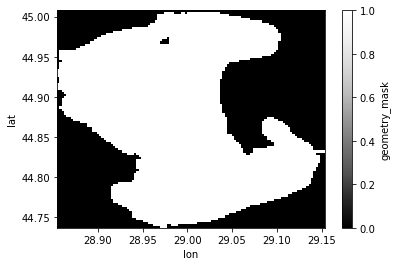

In [61]:
mask.plot.imshow(cmap='Greys_r')

In [76]:
chl = masked_cube.chl_c2rcc

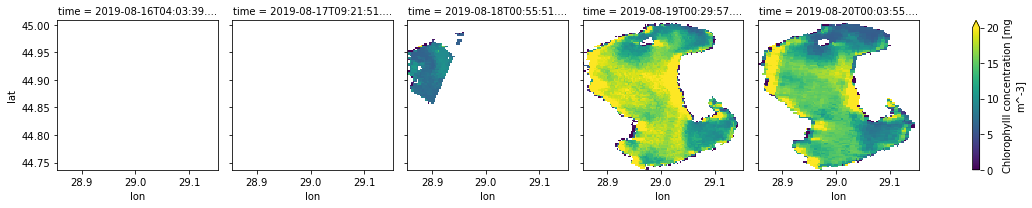

In [77]:
chl.plot.imshow(col='time', vmin=0, vmax=20, cmap='viridis')

In [80]:
chl_threshold = 18
thresholded_chl = chl.where(chl > chl_threshold)

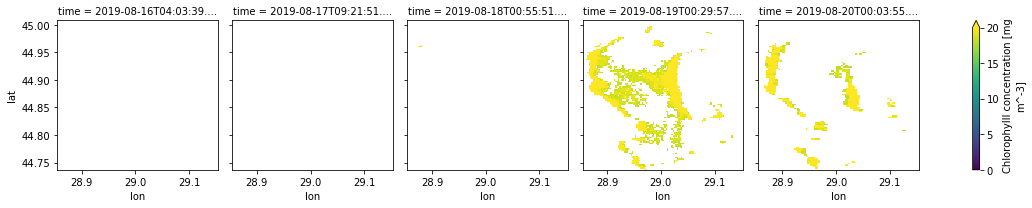

In [81]:
thresholded_chl.plot.imshow(col='time', vmin=0, vmax=20, cmap='viridis')

In [88]:
valid_count = thresholded_chl.count(dim=('lat', 'lon'))
valid_count.values

D:\Miniconda3\envs\xcube\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


array([   0,    0,    4, 2046,  759])

In [89]:
max_count = mask.where(mask == 1).count()
max_count.values

array(6962)

In [90]:
ratios = valid_count / max_count
ratios.values

D:\Miniconda3\envs\xcube\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


array([0.        , 0.        , 0.00057455, 0.29388107, 0.1090204 ])